<a href="https://colab.research.google.com/github/Revathi-Bejawada/RevathiINFO5502_Spring2022/blob/main/lab_assignment_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The seventh Lab-assignment (03/31/2022, 50 points in total)

The purpose of this exercise is to build several regression models based on real-world datasets. 

### Question 1 (25 points) Build a regession model to predict the change in price of the stock overtime. It can either be linear regression or non-linear regression. You can download the dataset from here: https://github.com/unt-iialab/info5502-spring2022/blob/main/datasets/portfolio_data.csv. The implementation of the LSTM on this same dataset was posted here as an reference: https://www.kaggle.com/code/faressayah/stock-market-analysis-prediction-using-lstm/notebook

In [1]:
### You code here
from google.colab import drive 
drive.mount('/content/gdrive')









Mounted at /content/gdrive


In [2]:
pip install keras

In [3]:
pip install tensorflow

     |████████████████████████████████| 462 kB 8.5 MB/s 


Root Mean Square score is 75.9549436001661
The R2 score is 0.9783453724222465


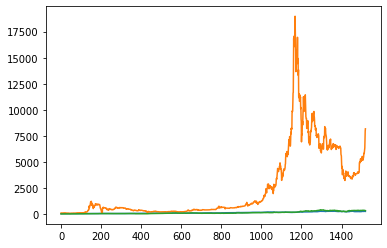

In [4]:
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# load the dataset
input = pd.read_csv("/content/gdrive/My Drive/portfolio_data.csv")

p = input.drop(['Date', 'AMZN'], axis = 1)
q = input['AMZN']

#divide the data into test and train to build the model

s_train_data, s_test_data, r_train_data, r_test_data = train_test_split(p, q, test_size = 0.35, random_state = 0)

plt.plot(p)
#apply linear regression 

linear_reg = LinearRegression()
linear_reg.fit(s_train_data, r_train_data)

r_prediction = linear_reg.predict(s_test_data)
print("Root Mean Square score is",np.sqrt(mean_squared_error(r_test_data, r_prediction)))
print("The R2 score is", r2_score(r_test_data, r_prediction))


In [5]:
from sklearn.ensemble import RandomForestRegressor
s_train_data, s_test_data, r_train_data, r_test_data = train_test_split(p, q, test_size = 0.35, random_state = 0)

ran_for_reg = RandomForestRegressor(random_state=211)
ran_for_reg.fit(s_train_data, r_train_data)

ran_for_reg_pred = ran_for_reg.predict(s_test_data)
print("Root Mean Square score is score is",np.sqrt(mean_squared_error(r_test_data, ran_for_reg_pred)))
print("The score of R2 is", r2_score(r_test_data, ran_for_reg_pred))

Root Mean Square score is score is 29.855905145036516
The score of R2 is 0.9966542066596528


In [6]:
from keras.layers import Dense, LSTM


from keras.models import Sequential

#LSTM model

lstm_model = Sequential()
lstm_model.add(LSTM(50, return_sequences=True, input_shape= (s_train_data.shape[1], 1)))
lstm_model.add(LSTM(50, return_sequences=False))

lstm_model.add(Dense(50))
lstm_model.add(Dense(1))

# model compilation
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# model training
lstm_model.fit(s_train_data, r_train_data, batch_size=1, epochs=15)


Epoch 1/15
988/988 [==============================] - 7s 4ms/step - loss: 365619.0625
Epoch 2/15
988/988 [==============================] - 4s 4ms/step - loss: 19612.7363
Epoch 3/15
988/988 [==============================] - 4s 4ms/step - loss: 9322.9150
Epoch 4/15
988/988 [==============================] - 4s 4ms/step - loss: 7916.8618
Epoch 5/15
988/988 [==============================] - 5s 6ms/step - loss: 8506.7900
Epoch 6/15
988/988 [==============================] - 6s 6ms/step - loss: 7555.3481
Epoch 7/15
988/988 [==============================] - 5s 5ms/step - loss: 7429.3101
Epoch 8/15
988/988 [==============================] - 5s 5ms/step - loss: 7150.8848
Epoch 9/15
988/988 [==============================] - 7s 7ms/step - loss: 7240.5083
Epoch 10/15
988/988 [==============================] - 6s 6ms/step - loss: 7593.3892
Epoch 11/15
988/988 [==============================] - 7s 7ms/step - loss: 7076.9839
Epoch 12/15
988/988 [==============================] - 7s 7ms/step - lo

### Question 2 (25 points) The objective of this task is to detect hate speech in tweets. For the sake of simplicity, we say a tweet contains hate speech if it has a racist or sexist sentiment associated with it. So, the task is to classify racist or sexist tweets from other tweets. Formally, given a training sample of tweets and labels, where label '1' denotes the tweet is racist/sexist and label '0' denotes the tweet is not racist/sexist, your objective is to predict the labels on the test dataset. The dataset can be downloaded here: https://github.com/unt-iialab/info5502-spring2022/tree/main/datasets/Twitter%20Sentiment%20Analysis. Please build a logistic regression model for the classification, evaluation metrics include accuracy, precision, recall, and F-1 score need to be reported. 

In [2]:
### You code here:



import pandas as pd
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2

from sklearn.ensemble import RandomForestClassifier
import sqlite3
import pickle
import nltk
nltk.download('stopwords')

# load the dataset
input = pd.read_csv("/content/gdrive/My Drive/train.csv")

alpha_stopwords = stopwords.words("english")
alpha_stopwords = [re.sub('[^a-zA-Z0-9]+', '', word) for word in alpha_stopwords]

#remove unwanted chars
input['cleaned_tweets'] = input['tweet'].str.replace('[^a-zA-Z0-9 ]', '')
input['cleaned_tweets'] = input['cleaned_tweets'].apply(lambda p: ' '.join([word for word in p.split() if word not in (alpha_stopwords)]))





[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: FutureWarning: The default value of regex will change from True to False in a future version.


In [3]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')
word_lemmet = WordNetLemmatizer()

# applying lemmatization on the tweets

input['cleaned_tweets'] = input['cleaned_tweets'].apply(lambda row: " ".join(word_lemmet.lemmatize(word, pos="a") for word in row.split()))

input['cleaned_tweets'] = input['cleaned_tweets'].apply(lambda row: " ".join(word_lemmet.lemmatize(word, pos="r") for word in row.split()))

input['cleaned_tweets'] = input['cleaned_tweets'].apply(lambda row: " ".join(word_lemmet.lemmatize(word, pos="v") for word in row.split()))

input['cleaned_tweets'] = input['cleaned_tweets'].apply(lambda row: " ".join(word_lemmet.lemmatize(word, pos="n") for word in row.split()))



[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [4]:
from sklearn.linear_model import LogisticRegression
p = input['cleaned_tweets']
q = input['label']

# initializing tf-idf vectorizer
v = TfidfVectorizer(min_df = 3, ngram_range=(1, 2))

#for feature generations
v = v.fit(p)
#transform
P_features = v.transform(p).toarray()

# split the dataset into train and test
P_train, P_test, q_train, q_test = train_test_split(P_features, q, test_size=0.2)

# logistic regression
logre = LogisticRegression()
data_model = logre.fit(P_train, q_train)



print("Confusion Matrix:")
print(confusion_matrix(q_test, data_model.predict(P_test)))

print("Classification Report")
print(classification_report(q_test, data_model.predict(P_test)))

print(P_features.shape)


Confusion Matrix:
[[5931    4]
 [ 318  140]]
Classification Report
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      5935
           1       0.97      0.31      0.47       458

    accuracy                           0.95      6393
   macro avg       0.96      0.65      0.72      6393
weighted avg       0.95      0.95      0.94      6393

(31962, 17049)


In [5]:
print(P_features.shape)


(31962, 17049)


In [6]:
df_test = pd.read_csv("/content/gdrive/My Drive/test.csv")

df_test['cleaned_tweets'] = df_test['tweet'].str.replace('[^a-zA-Z0-9 ]', '')
df_test['cleaned_tweets'] = df_test['cleaned_tweets'].apply(lambda x: ' '.join([word for word in x.split() if word not in (alpha_stopwords)]))

df_test['cleaned_tweets'] = df_test['cleaned_tweets'].apply(lambda row: " ".join(word_lemmet.lemmatize(word, pos="v") for word in row.split()))
df_test['cleaned_tweets'] = df_test['cleaned_tweets'].apply(lambda row: " ".join(word_lemmet.lemmatize(word, pos="n") for word in row.split()))
df_test['cleaned_tweets'] = df_test['cleaned_tweets'].apply(lambda row: " ".join(word_lemmet.lemmatize(word, pos="a") for word in row.split()))
df_test['cleaned_tweets'] = df_test['cleaned_tweets'].apply(lambda row: " ".join(word_lemmet.lemmatize(word, pos="r") for word in row.split()))

# vectorizer.fit_transform(data['cleaned_tweets']).toarray()
df_test_features = v.transform(df_test['cleaned_tweets'])#.toarray()
print(df_test_features.shape)


#print(classification_report(y_test, model.predict(test_data_features)))
#print(confusion_matrix(y_test, model.predict(test_data_features)))

df_test_prediction = data_model.predict(df_test_features)
print(df_test_prediction)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


(17197, 17049)
[0 0 0 ... 0 0 0]
